In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_terrain(size, height_range):
    """Initialize a grid with random heights within a specified range."""
    return np.random.randint(height_range[0], height_range[1] + 1, size=size)

def display_terrain(grid):
    """Visualize the terrain using a heatmap."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='terrain')
    plt.colorbar(label="Height")
    plt.axis('off')
    plt.show()

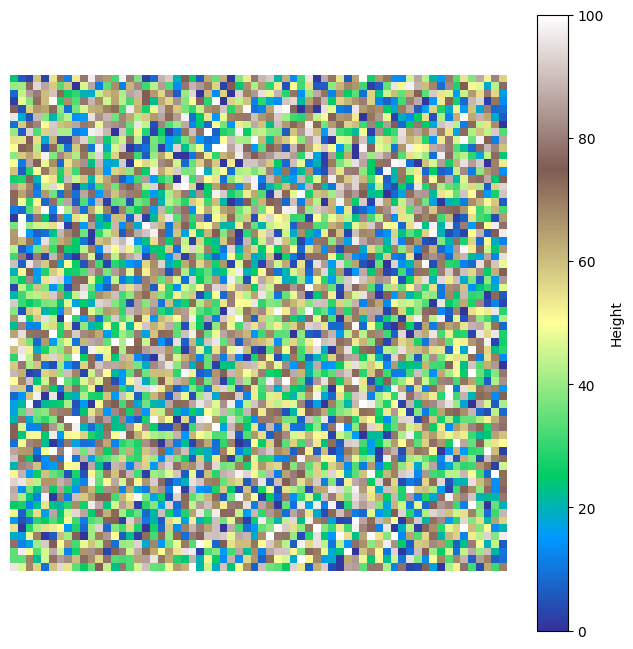

In [3]:
size = (64, 64)  # Terrain size
height_range = (0, 100)  # Minimum and maximum height

# Initialize and display the terrain
grid = initialize_terrain(size, height_range)
display_terrain(grid)

In [4]:
def smooth_terrain(grid, smoothing_factor):
    """Smooth the terrain by averaging the height of each cell with its neighbors."""
    new_grid = grid.copy()
    rows, cols = grid.shape

    for x in range(rows):
        for y in range(cols):
            neighbors = grid[max(0, x-1):min(rows, x+2), max(0, y-1):min(cols, y+2)]
            new_grid[x, y] = (1 - smoothing_factor) * grid[x, y] + smoothing_factor * neighbors.mean()
    
    return new_grid.astype(int)


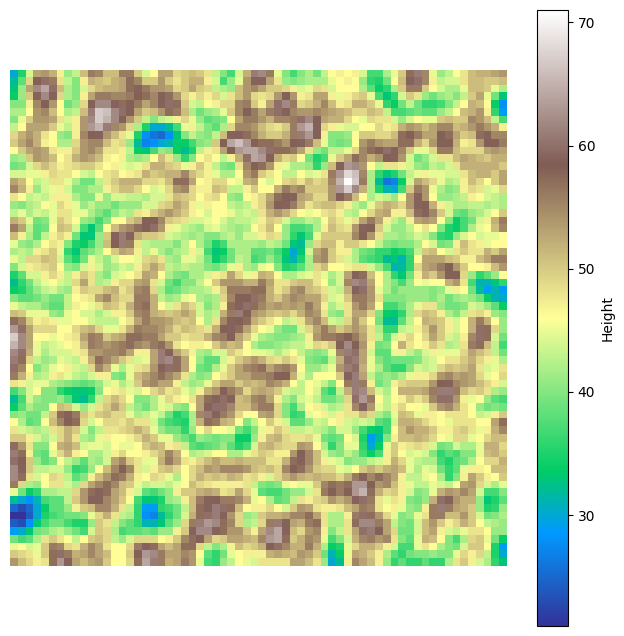

In [5]:
smoothing_factor = 0.5  # Weight given to neighboring cells during smoothing
iterations = 5  # Number of smoothing iterations

# Smooth the terrain over multiple iterations
for _ in range(iterations):
    grid = smooth_terrain(grid, smoothing_factor)

display_terrain(grid)


In [6]:
def add_features(grid, water_level, mountain_level):
    """Add water and mountain features to the terrain."""
    features = np.zeros_like(grid, dtype=int)
    
    features[grid <= water_level] = 1  # Water (1)
    features[grid >= mountain_level] = 2  # Mountains (2)
    return features

def display_features(grid, features):
    """Overlay features on the terrain visualization."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='terrain')
    plt.imshow(features, cmap='cool', alpha=0.3)
    plt.colorbar(label="Height")
    plt.axis('off')
    plt.show()


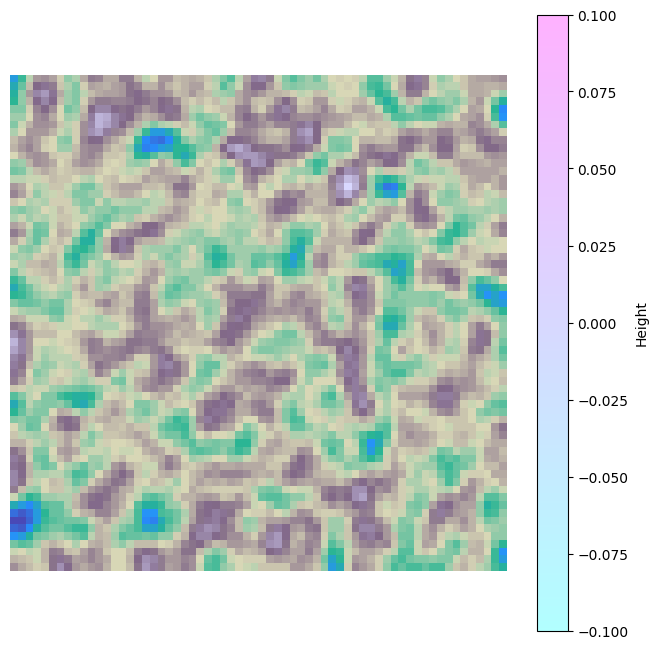

In [7]:
water_level = 20  # Height below which cells are water
mountain_level = 80  # Height above which cells are mountains

# Add features to the terrain
features = add_features(grid, water_level, mountain_level)

# Display terrain with features
display_features(grid, features)


In [8]:
def save_terrain(grid, filename):
    """Save the terrain grid to a file."""
    np.savetxt(filename, grid, fmt='%d')

# Save the terrain to a file
save_terrain(grid, "terrain_heightmap.txt")
save_terrain(features, "terrain_features.txt")
print("Terrain and features saved.")


Terrain and features saved.


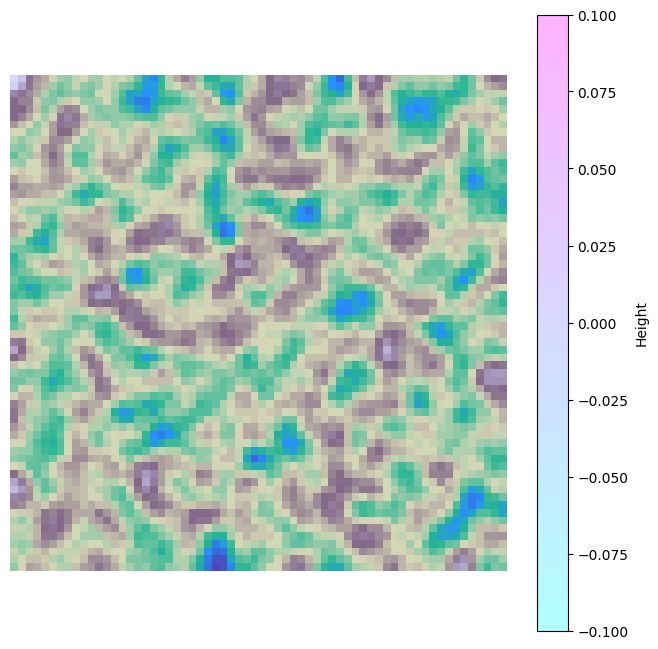

: 

In [9]:
def generate_terrain(size, height_range, smoothing_factor, iterations, water_level, mountain_level, heightmap_file, features_file):
    """Generate terrain with features and save it to files."""
    grid = initialize_terrain(size, height_range)
    for _ in range(iterations):
        grid = smooth_terrain(grid, smoothing_factor)
    features = add_features(grid, water_level, mountain_level)
    save_terrain(grid, heightmap_file)
    save_terrain(features, features_file)
    display_features(grid, features)

# Generate and save terrain
generate_terrain(
    size=(64, 64),
    height_range=(0, 100),
    smoothing_factor=0.5,
    iterations=5,
    water_level=20,
    mountain_level=80,
    heightmap_file="terrain_heightmap.txt",
    features_file="terrain_features.txt"
)
